In [ ]:
import os
from pathlib import Path
import gc

import random
import numpy as np
import pandas as pd

import math

from collections import defaultdict

import warnings
warnings.simplefilter("ignore")

In [ ]:
#Fillna para los valores que no tienen label
biz_label = pd.read_csv("/content/drive/MyDrive/dataset/train.csv").fillna('')
biz_label.head()

,business_id,labels
0,1000,1 2 3 4 5 6 7
1,1001,0 1 6 8
2,100,1 2 4 5 6 7
3,1006,1 2 4 5 6
4,1010,0 6 8


In [ ]:
photo_biz = pd.read_csv("/content/drive/MyDrive/dataset/train_photo_to_biz_ids.csv")
photo_biz.head()

,photo_id,business_id
0,204149,3034
1,52779,2805
2,278973,485
3,195284,485
4,19992,485


In [ ]:
bizs, labels = biz_label['business_id'], biz_label['labels']
biz2label = {biz:label for biz, label in zip (bizs, labels)}

In [ ]:
bizzes = list(biz2label.keys())
len(bizzes)

2000

In [ ]:
photo2biz = {photo:biz for photo,biz in zip (photo_biz['photo_id'], photo_biz['business_id'])}

Buscamos extraer para cada restaurante, su lista de imágenes

In [ ]:
#Defaultdic para cuando hay registros que no tienen id de imagenes
biz2photos = defaultdict(lambda: [])
for img, biz in photo2biz.items():
  biz2photos[biz].append(img)

In [ ]:
biz2photos[3][:4]

[231210, 54476, 276530, 414322]

Vamos a crear un nuevo DF en el que tengamos el nombre de la foto y las labels que le corresponden al restaurante, haciendo uso de "apply"

In [ ]:
photo_label= photo_biz.copy()
photo_label['labels'] = photo_label.business_id.apply(lambda x: biz2label[x])
photo_label.head()

,photo_id,business_id,labels
0,204149,3034,3 8
1,52779,2805,1 2 3 5 6 7
2,278973,485,1 2 3 4 5 6 7
3,195284,485,1 2 3 4 5 6 7
4,19992,485,1 2 3 4 5 6 7


In [ ]:
# Hecho lo anterior, podemos prescindir de business_id
#photo_label.drop('business_id',1, inplace=True)
#photo_label.head()

# Tarea: Yelp EDA primera parte

- Para cada label ¿qué porcentaje de los restaurantes tienen labels? 
- Baseline F1-Score

## Porcentaje de cada label

In [ ]:
num_labels = 9
# Creamos una columna correspondiente a cada label para cada photo id
for i in range(num_labels):
  photo_label[i] = 0

for index, row in photo_label.iterrows():
  tmp = row['labels'].split() # obtenemos una lista con todas las labels correspondientes a una foto
  for label in tmp: 
    photo_label.loc[index, int(label)] = 1 # Marcamos con 1 todas aquellas que este presentes en una photo id

In [ ]:
photo_label

,photo_id,business_id,labels,0,1,2,3,4,5,6,7,8
0,204149,3034,3 8,0,0,0,1,0,0,0,0,1
1,52779,2805,1 2 3 5 6 7,0,1,1,1,0,1,1,1,0
2,278973,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0
3,195284,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0
4,19992,485,1 2 3 4 5 6 7,0,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
234837,325414,496,1 4 5 6 7,0,1,0,0,1,1,1,1,0
234838,301030,3565,1 2 5 6,0,1,1,0,0,1,1,0,0
234839,355839,1875,1 2 5 6 7 8,0,1,1,0,0,1,1,1,1
234840,20474,3888,0 1 2 3 5 6 7 8,1,1,1,1,0,1,1,1,1


In [ ]:
labels_group = photo_label.groupby('business_id').sum()

In [ ]:
porcentaje = {}
for i in range(num_labels):
  # Obtenemos el porcentaje y lo almacenamos en una lista
  porcentaje[i] = len(labels_group[labels_group[i]!=0])*100/len(labels_group)

In [ ]:
for key, value in porcentaje.items():
  print(f"label: {key} - Porcentaje: {value} %")

label: 0 - Porcentaje: 33.55 %
label: 1 - Porcentaje: 49.65 %
label: 2 - Porcentaje: 51.3 %
label: 3 - Porcentaje: 50.15 %
label: 4 - Porcentaje: 27.35 %
label: 5 - Porcentaje: 62.45 %
label: 6 - Porcentaje: 68.0 %
label: 7 - Porcentaje: 28.6 %
label: 8 - Porcentaje: 61.9 %


Observamos que las etiquetas: 2, 3, 5, 6, 8 aparecen más del 50 % de las veces, construiremos una label predeterminada a partir de estas etiquetas para obtener el F1-Score de ello

## Baseline: F1-Score

In [292]:
photo_label.labels[0]

'3 8'

In [293]:
baseline = "2 3 5 6 8"
#baseline = 23568

In [294]:
new_photo_label = pd.DataFrame(photo_label.business_id)

In [295]:
new_photo_label=new_photo_label.assign(labels=baseline)
new_photo_label.head()

,business_id,labels
0,3034,2 3 5 6 8
1,2805,2 3 5 6 8
2,485,2 3 5 6 8
3,485,2 3 5 6 8
4,485,2 3 5 6 8


"Observamos que tenemos registros duplicados en business_id por lo que debemos eliminarlos para no causar problemas en la evaluación de kaggle" Intente eso pero cuando envíe un dataset a evaluación en kaggle me pedía que debía tener 10000 registros al menos y tras eliminar duplicados obtuve únicamente 2000 por lo que he de abordar el problema por otro lado 

In [296]:
new_photo_label.dtypes

business_id     int64
labels         object
dtype: object

In [297]:
#new_photo_label.drop_duplicates(subset=None, 
                         # keep='first', 
                          #inplace=True,
                          #ignore_index=True)

In [298]:
#new_photo_label.head()

In [352]:
#for i in range(len(new_photo_label)): 
  #new_photo_label.business_id[i] = f"{new_photo_label.business_id[i]} {new_photo_label.index[i]}"

En este caso he modidicado un poco el id del negocio de tal forma que ahora no haya id repetidos dado que cada uno tiene su indice añadido en su id.

In [ ]:
#new_photo_label=new_photo_label.applymap(str)

In [302]:
new_photo_label.head()

,business_id,labels
0,3034,2 3 5 6 8
1,2805,2 3 5 6 8
2,485,2 3 5 6 8
3,485,2 3 5 6 8
4,485,2 3 5 6 8


In [303]:
len(list(set(new_photo_label.business_id)))
# Al parecer hay valores que se siguen repitiendo, por lo que los eliminaremos

2000

In [ ]:
new_photo_label.drop_duplicates(subset=None, 
                          keep='first', 
                          inplace=True,
                          ignore_index=True)

In [304]:
new_photo_label

,business_id,labels
0,3034,2 3 5 6 8
1,2805,2 3 5 6 8
2,485,2 3 5 6 8
3,485,2 3 5 6 8
4,485,2 3 5 6 8
...,...,...
234837,496,2 3 5 6 8
234838,3565,2 3 5 6 8
234839,1875,2 3 5 6 8
234840,3888,2 3 5 6 8


In [305]:
len(list(set(new_photo_label.business_id)))
# Listo, no hay repetidos

2000

In [312]:
train_df = new_photo_label[0:10000] #kaggle pide solo 10000 

In [316]:
#final_df.to_csv("kaggle_yelp_h5.csv", index = False, float_format=str)

In [328]:
test_df = photo_label[["business_id", "labels"]][0:10000]

In [329]:
train_df.head()

,business_id,labels
0,3034,2 3 5 6 8
1,2805,2 3 5 6 8
2,485,2 3 5 6 8
3,485,2 3 5 6 8
4,485,2 3 5 6 8


In [330]:
test_df.head()

,business_id,labels
0,3034,3 8
1,2805,1 2 3 5 6 7
2,485,1 2 3 4 5 6 7
3,485,1 2 3 4 5 6 7
4,485,1 2 3 4 5 6 7


In [331]:
 from sklearn.metrics import f1_score

In [334]:
f1_score(train_df.labels, test_df.labels, average="macro")

4.303635855024854e-05

In [340]:
fruit_list = [ ('3232', "3 2 1")]
#Create a DataFrame object
new_test_df = pd.DataFrame(fruit_list, columns = ['Business_id' , 'Labels'])
new_train_df = pd.DataFrame(fruit_list, columns = ['Business_id' , 'Labels'])

In [341]:
# ELEGIMOS UNICAMENTE LOS NEGOCIOS QUE APARECEN TANTO EN EL TEST COMO EN EL TRAIN 
# PARA FORMAR LOS DOS NUEVOS DATAFRAMES
# UNO DE TEST CON LOS DATOS ORIGINALES Y UNO DE TRAIN CON LAS LABELS QUE APARECEN MÁS DEL 
# 50 % DE LAS VECES
for i in range(len(train_df)): 
  if test_df.business_id[i] in train_df.business_id: 
      new_test_df=new_test_df.append({'Business_id':test_df.business_id[i], 'Labels' : test_df.labels[i]}, ignore_index=True)
      new_train_df=new_train_df.append({'Business_id':train_df.business_id[i], 'Labels' : train_df.labels[i]}, ignore_index=True)


In [345]:
new_test_df

,Business_id,Labels
0,3232,3 2 1
1,3034,3 8
2,2805,1 2 3 5 6 7
3,485,1 2 3 4 5 6 7
4,485,1 2 3 4 5 6 7
...,...,...
9996,1688,1 3 6 8
9997,956,1 2 3 5 6 7
9998,850,1 2 3 5 6 7 8
9999,850,1 2 3 5 6 7 8


In [344]:
new_train_df

,Business_id,Labels
0,3232,3 2 1
1,3034,2 3 5 6 8
2,2805,2 3 5 6 8
3,485,2 3 5 6 8
4,485,2 3 5 6 8
...,...,...
9996,1688,2 3 5 6 8
9997,956,2 3 5 6 8
9998,850,2 3 5 6 8
9999,850,2 3 5 6 8


Observamos que ya tenemos un dataset para entrenar y otro para testear de igual longitud, uno es el original 
que teniamos para testear pero el de entrenamiento es el dataset que contiene nuestras labels que aparecen más del 50 % de las veces

In [353]:
f1_score(new_train_df.Labels, new_test_df.Labels, average="weighted")

0.006081445693915156

Observamos que hay filas en las que coinciden algunas etiquetas, no todas. Es por ello que he elegido "weighted" para que calcule f1 score para cada registro y al final haga un promedio del mismo. 

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 2.6 MB/s 
     |████████████████████████████████| 1.2 MB 37.1 MB/s 
     |████████████████████████████████| 186 kB 54.3 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 51 kB 266 kB/s 
Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
import seaborn as sns
import pandas as pd
import torch 
import torch.nn as nn
import torch.nn.functional as F
import fastai.tabular.all as ft
from torch.utils.data import Dataset, DataLoader

In [ ]:
def cargar_datos_plus(df): 
  X = ft.range_of(df)
  valid_cut = len(df) - int(len(df)*0.3)
  # TODO: Por alguna razón, me marcaba error ssi tenia dos campos "iguales" de dataframes diferentes
  # como IsHoliday_sales y IsHoliday_features
  src = ft.TabularPandas(df,
                         cont_names=list(['business_id']), # Tomate estas columnas
                         y_names=['labels'], # Para predecir esta
                        splits = (X[:valid_cut], X[valid_cut:])) # primeros para entrerar, últimos para validar
  
  return src.dataloaders(bs=1024)

In [348]:
dls_plus = cargar_datos_plus(train_df)

In [349]:
learn_plus = ft.tabular_learner(dls_plus, layers=[], metrics=[F1Score])

SuggestedLRs(valley=6.309573450380412e-07)

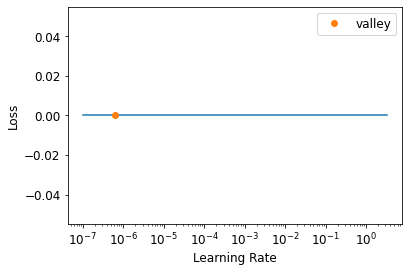

In [350]:
learn_plus.lr_find()

In [351]:
learn_plus.fit_one_cycle(5, 1e-6)

epoch,train_loss,valid_loss,F1Score,time


TypeError: ignored

Intente hacerlo así pero me salia el error anterior, búsque como resolverlo pero no pude resolverlo. Lo lamento 